first we load libraries

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

now we load the data frame

In [20]:
# load data-frame
df = pd.read_csv('yeast_strain_treatment_dataset.csv')

df

DT inflection         Strain       Treatment  Time_0  Time_0.5  \
0         88.642690         BY4743    1 uM Torin 1       0  0.082333   
1         84.383101         BY4743       2.5% DMSO       0  0.076000   
2         75.622916     DBVPG 6765    1 uM Torin 1       0  0.109667   
3         75.872172     DBVPG 6765       2.5% DMSO       0  0.101333   
4         83.891908            SK1    1 uM Torin 1       0  0.048333   
...             ...            ...             ...     ...       ...   
2835      82.277037  UWOPS91-917.1  2.5 ng/mL RAPA       0  0.047333   
2836      60.376021        CLIB324         1% DMSO       0  0.013000   
2837      72.103572        CLIB324  2.5 ng/mL RAPA       0  0.042667   
2838      55.118277            PW5         1% DMSO       0  0.049333   
2839      56.269090            PW5  2.5 ng/mL RAPA       0  0.050667   

        Time_1  Time_1.5    Time_2  Time_2.5    Time_3  ...  Time_15.5  \
0     0.101667  0.116000  0.138333  0.172333  0.216000  ...   1.200333   
1     0.088667  0.100000  0.118000  0.143000  0.181000  ...   1.217333   
2     0.145667  0.179667  0.229667  0.302333  0.394333  ...   1.579667   
3     0.135000  0.160667  0.205333  0.267000  0.350333  ...   1.585667   
4     0.063667  0.076667  0.093667  0.119000  0.150667  ...   0.900667   
...        ...       ...       ...       ...       ...  ...        ...   
2835  0.052667  0.057333  0.067333  0.093000  0.120667  ...   1.616000   
2836  0.024667  0.041000  0.069000  0.105333  0.155000  ...   1.630667   
2837  0.049333  0.051333  0.061333  0.088667  0.116667  ...   1.592333   
2838  0.061000  0.077000  0.106000  0.152667  0.223667  ...   1.681000   
2839  0.059000  0.073000  0.100333  0.143333  0.206333  ...   1.717000   

       Time_16  Time_16.5   Time_17  Time_17.5   Time_18  Time_18.5   Time_19  \
0     1.209000   1.217667  1.227000   1.234667  1.247667   1.249000  1.258667   
1     1.224000   1.233667  1.240667   1.255333  1.266667   1.271000  1.280333   
2     1.597000   1.607000  1.620667   1.630333  1.644333   1.644667  1.653667   
3     1.602667   1.617667  1.629333   1.640000  1.655000   1.658667  1.666667   
4     0.915333   0.930333  0.948333   0.960000  0.977000   0.980667  0.993333   
...        ...        ...       ...        ...       ...        ...       ...   
2835  1.635000        NaN       NaN        NaN       NaN        NaN       NaN   
2836  1.650000        NaN       NaN        NaN       NaN        NaN       NaN   
2837  1.611000        NaN       NaN        NaN       NaN        NaN       NaN   
2838  1.697667        NaN       NaN        NaN       NaN        NaN       NaN   
2839  1.734333        NaN       NaN        NaN       NaN        NaN       NaN   

      Time_19.5   Time_20  
0      1.277667  1.280000  
1      1.289333  1.298333  
2      1.673000  1.672333  
3      1.679333  1.685000  
4      1.015667  1.020000  
...         ...       ...  
2835        NaN       NaN  
2836        NaN       NaN  
2837        NaN       NaN  
2838        NaN       NaN  
2839        NaN       NaN  

[2840 rows x 44 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2840 entries, 0 to 2839
Data columns (total 44 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DT inflection  2724 non-null   float64
 1   Strain         2840 non-null   object 
 2   Treatment      2840 non-null   object 
 3   Time_0         2840 non-null   int64  
 4   Time_0.5       2840 non-null   float64
 5   Time_1         2840 non-null   float64
 6   Time_1.5       2840 non-null   float64
 7   Time_2         2840 non-null   float64
 8   Time_2.5       2840 non-null   float64
 9   Time_3         2840 non-null   float64
 10  Time_3.5       2840 non-null   float64
 11  Time_4         2840 non-null   float64
 12  Time_4.5       2840 non-null   float64
 13  Time_5         2840 non-null   float64
 14  Time_5.5       2840 non-null   float64
 15  Time_6         2840 non-null   float64
 16  Time_6.5       2840 non-null   float64
 17  Time_7         2840 non-null   float64
 18  Time_7.5

## analyzing data
in this data we are interested in 3 columns: DT inflection, Strain and Treatment.
As we can see, there are a number of Strains, and a number of treatments. 

inflection time is a dependent variable that depends on treatment and strain.

Each strain will have its own treatments. we can visualize what treatement each strain has:

In [22]:
treatments = df['Treatment']
strains = df['Strain']
inflection_times = df['DT inflection']


In [23]:
treatments = df['Treatment']
strains = df['Strain']
inflection_times = df['DT inflection']


now let's load unique datas from the tables

In [24]:
unique_strains = np.unique(strains)
unique_treatments = np.unique(treatments)
unique_inflection_times = np.unique(inflection_times)


In [25]:
unique_strains

array(['273614 N', '322134 S ', '378604 X', 'A12', 'A4', 'BC187',
       'BY4743', 'CBS432', 'CBS5829', 'CBS7960', 'CLIB215', 'CLIB324',
       'CLIB382', 'DBVPG 1106', 'DBVPG 1373', 'DBVPG 1788', 'DBVPG 1853',
       'DBVPG 4650', 'DBVPG 6040 ', 'DBVPG 6044', 'DBVPG 6304',
       'DBVPG 6765', 'FL100', 'FM356', 'FM476', 'FM479', 'FM527', 'FM677',
       'IFO1804', 'K11', 'KPN3828', 'KPN3829', 'L-1374', 'L-1528', 'N-17',
       'N-43', 'N-44', 'N-45', 'NCYC110 ', 'NCYC361', 'PW5', 'Q31.4',
       'Q32.3', 'Q59.1', 'Q62.5', 'Q69.8', 'Q74.4', 'Q89.8', 'Q95.3',
       'S288c ', 'S36.7', 'SK1', 'T21.4', 'T7', 'T73', 'UC5', 'UFRJ50791',
       'UFRJ50816', 'UWOPS03-461.4 ', 'UWOPS05-217.3 ', 'UWOPS05-227.2 ',
       'UWOPS83-787.3', 'UWOPS87-2421', 'UWOPS91-917.1', 'W303', 'W7',
       'Y10', 'Y12', 'Y55', 'Y6.5', 'Y7', 'Y8.1', 'Y8.5', 'Y9', 'Y9.6',
       'YIIc17_E5 ', 'YJM269', 'YJM975 ', 'YJM978', 'YJM981 ', 'YPS128',
       'YPS138', 'YPS606', 'YS2 ', 'YS4', 'YS9', 'Z1', 'Z1.1'],
      

In [26]:
unique_treatments

array(['1 mg/mL Caffeine', '1 uM Torin 1', '1% DMSO', '100 uM AZD8055',
       '100 uM GDC0941', '2.5 ng/mL RAPA', '2.5% DMSO', '20 ng/mL RAPA',
       '25 uM Torin 1', '6.67% H2O'], dtype=object)

## relationship between values

here we have a multivariate relationship:

the treatments depend on the strain, and the inflection time depends on the two.

**-for each strain, there are a number of treatments**

**-for each treatment in a strain, there is a range of inflection times**

## now we can find the inflection time of a treatment for each strain type. 
for each strain we could plot a graph of treatment against inflection time. each treatment for a given strain could give us a range of inflection times, so we would use a box plot to better visualize the distribution


first we create a helper function (which we'll use to make colors for the boxes)

In [27]:
# Generate random colors
def generate_random_colors(num_colors):
    colors = []
    for _ in range(num_colors):
        r = random.random()
        g = random.random()
        b = random.random()
        colors.append((r, g, b))
    return colors

now that we have everything ready, we can loop through each strain value and plot graphs of treatment vs inflection time.

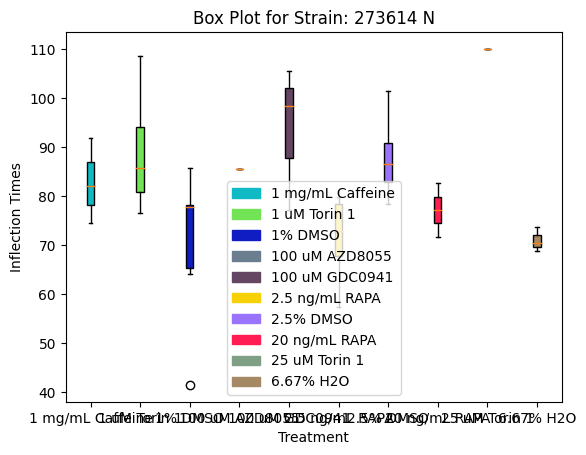

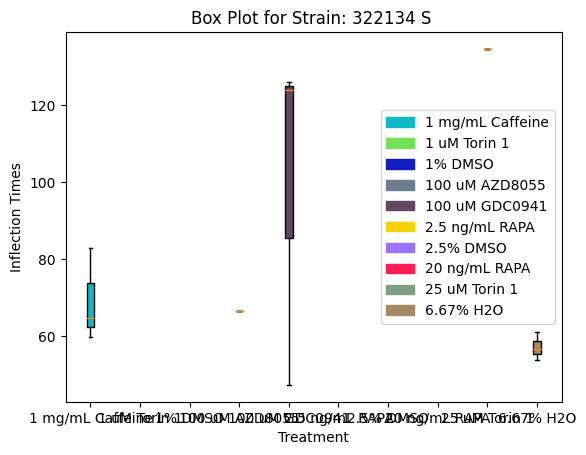

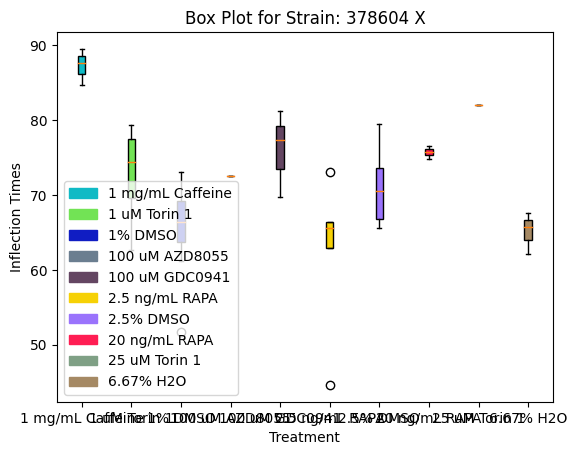

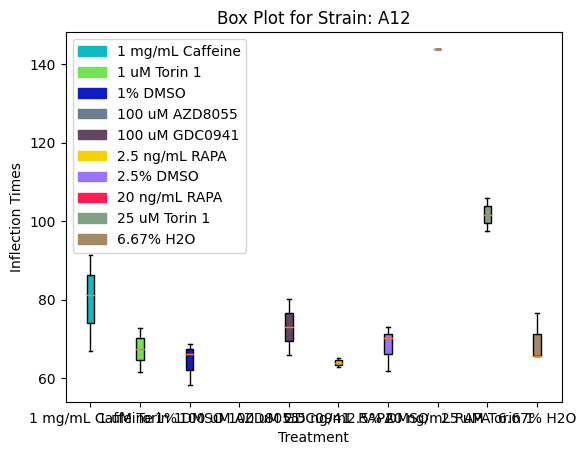

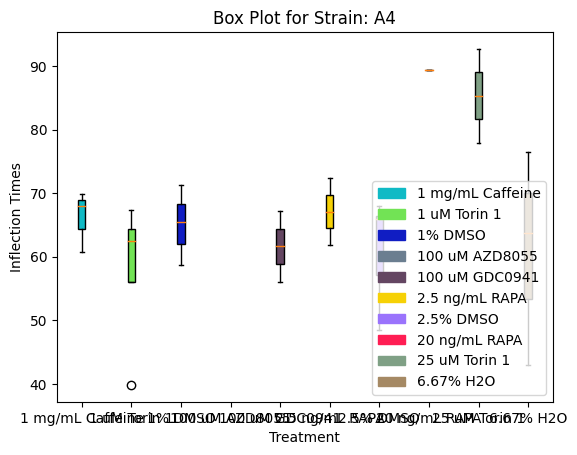

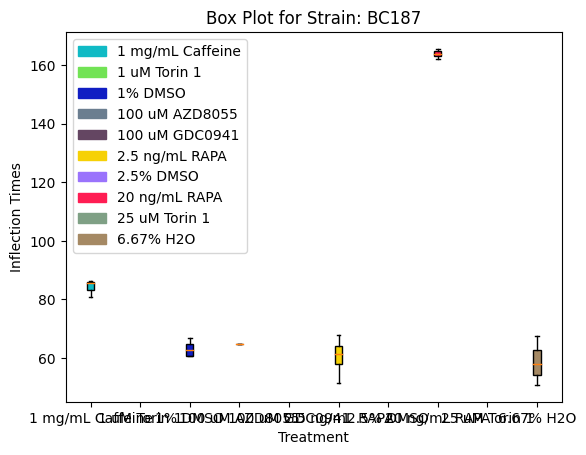

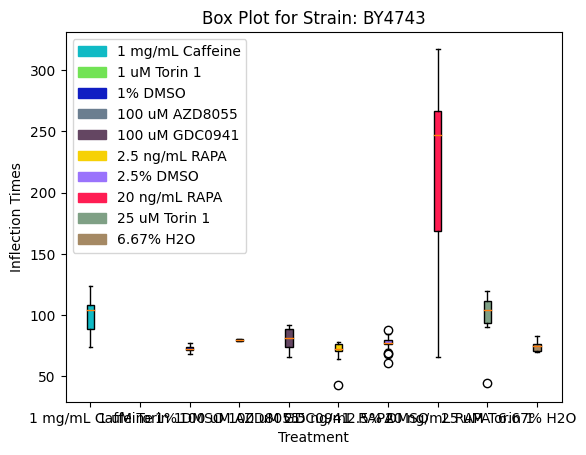

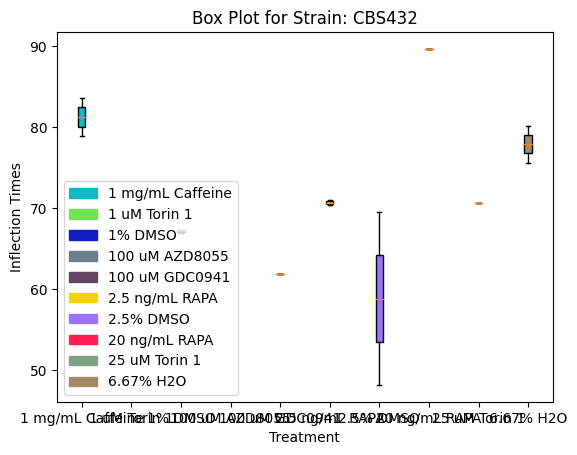

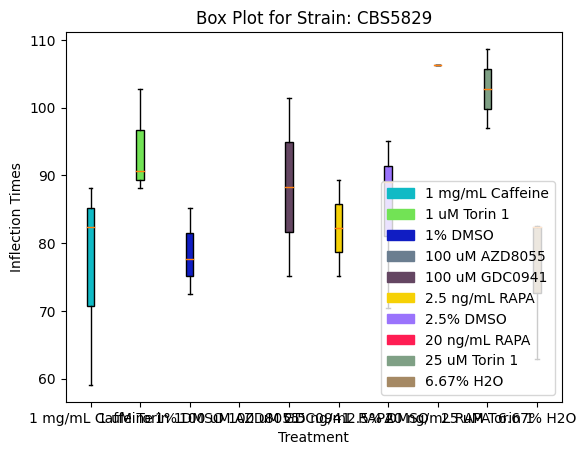

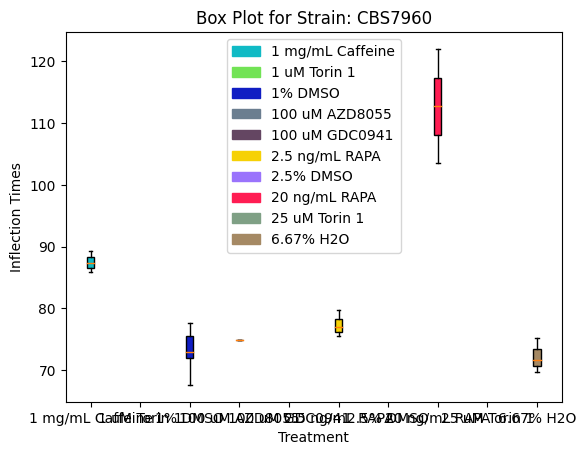

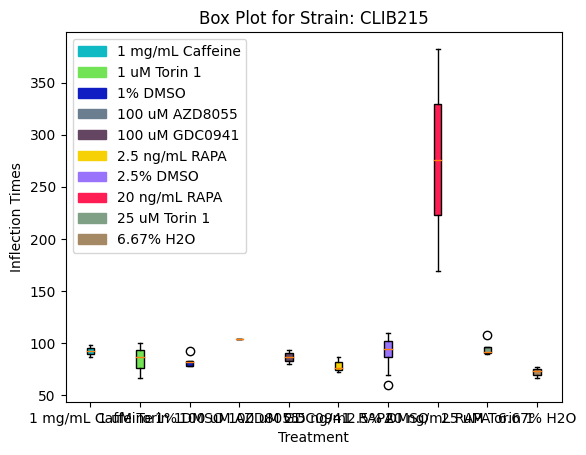

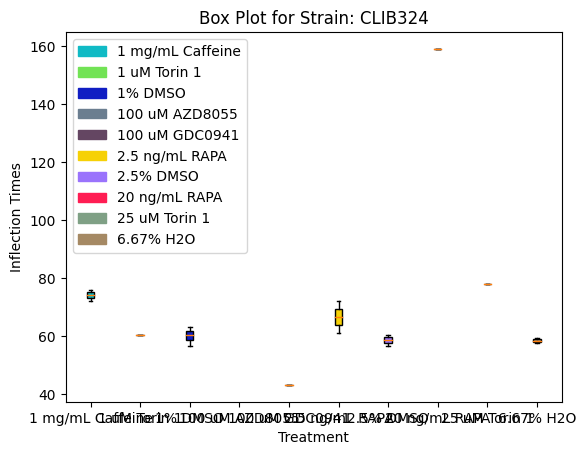

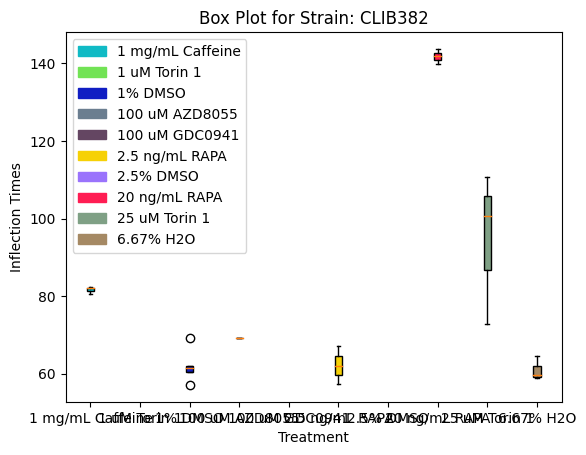

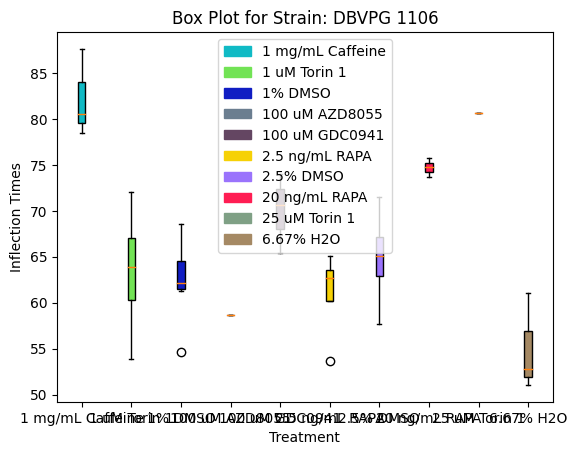

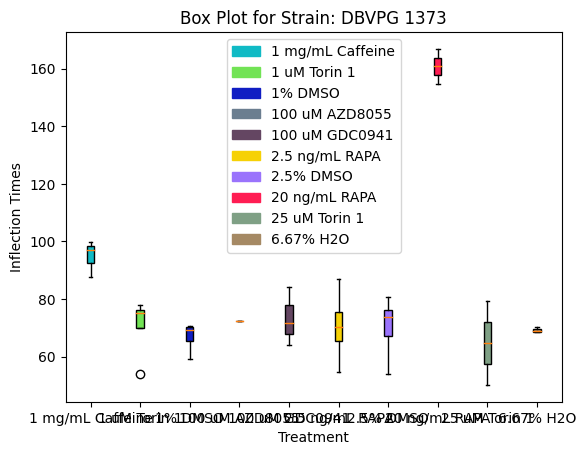

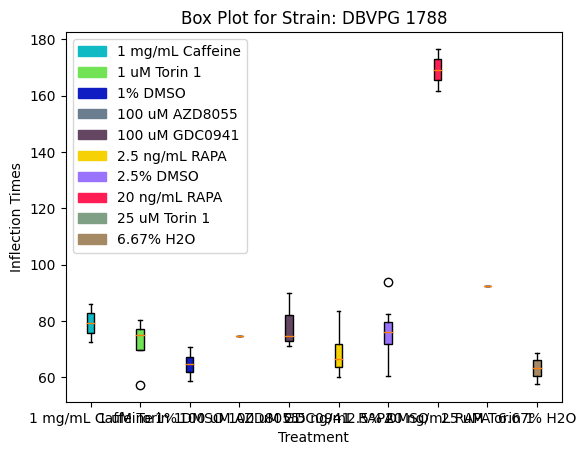

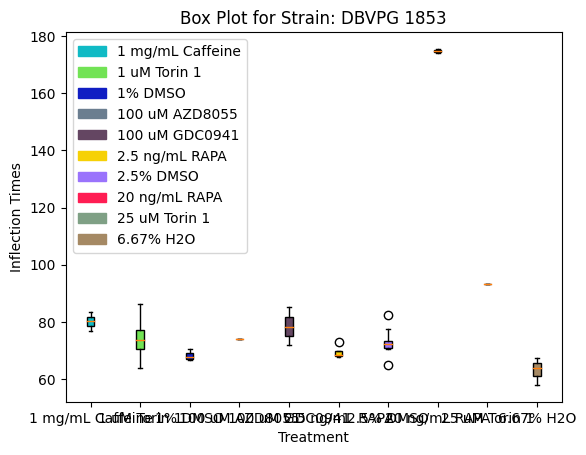

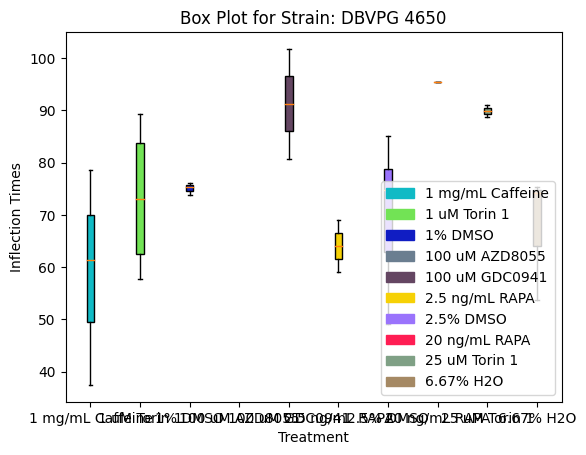

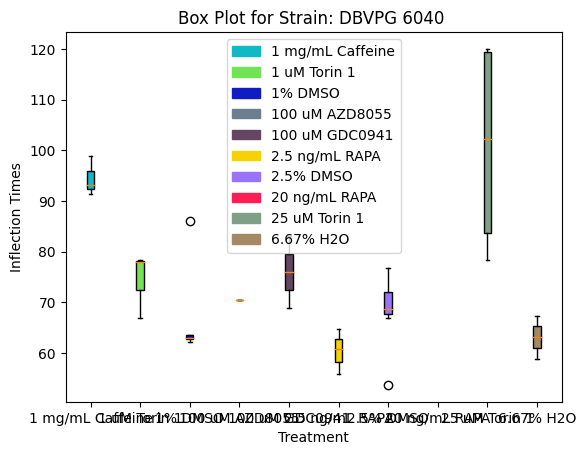

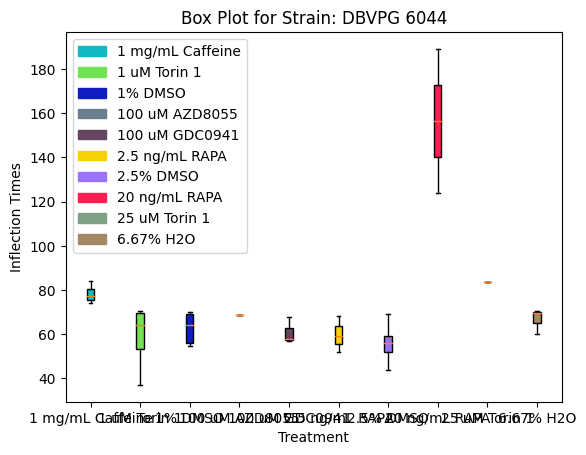

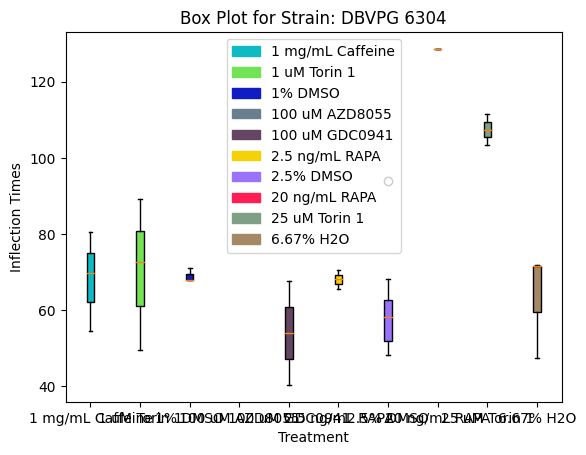

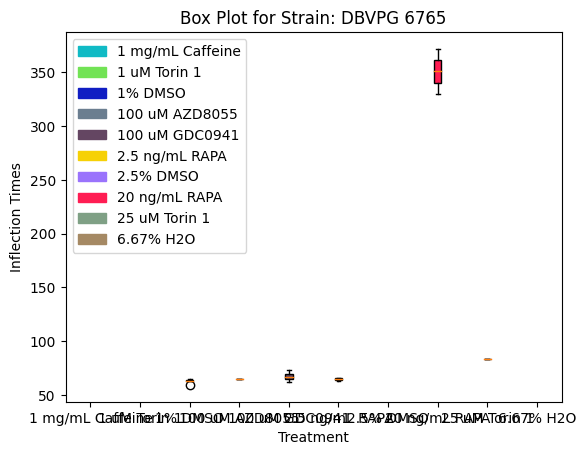

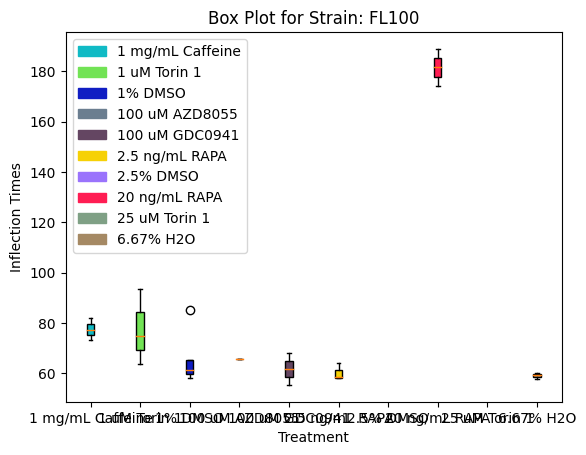

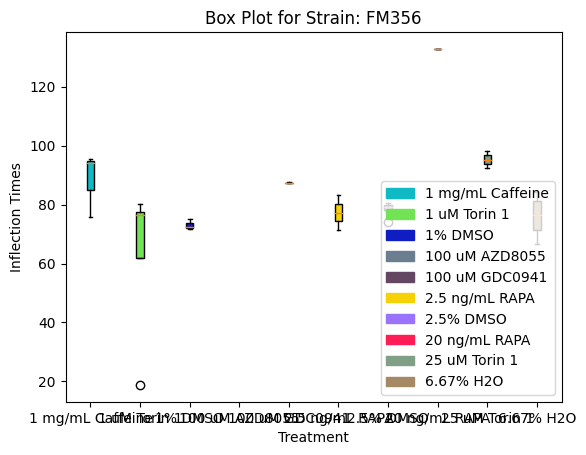

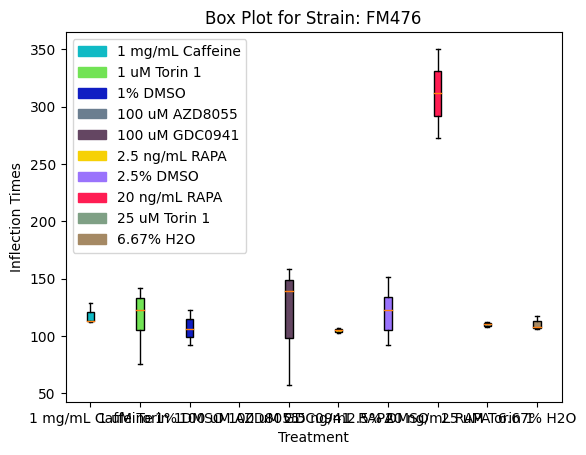

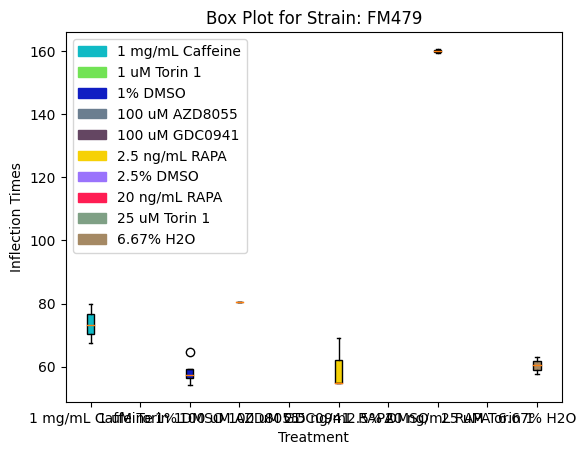

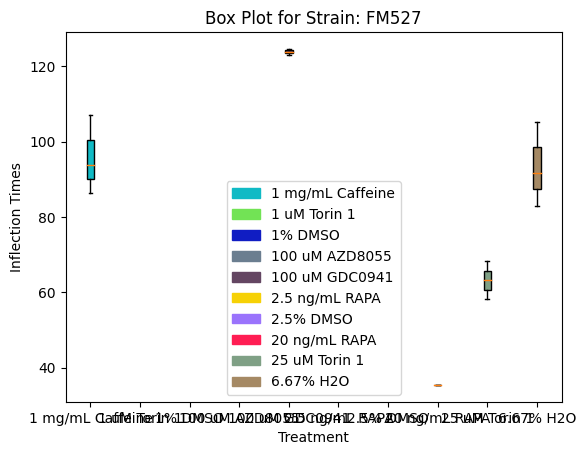

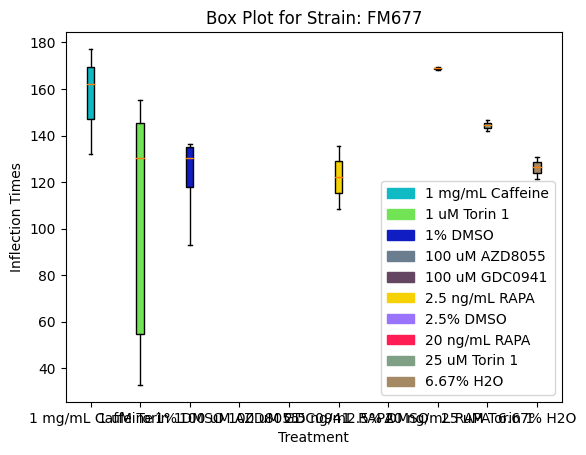

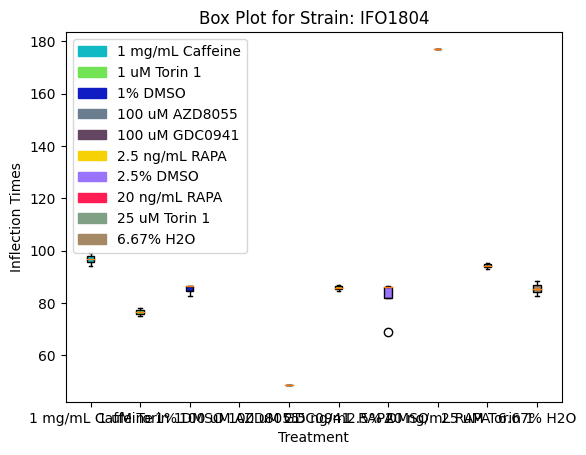

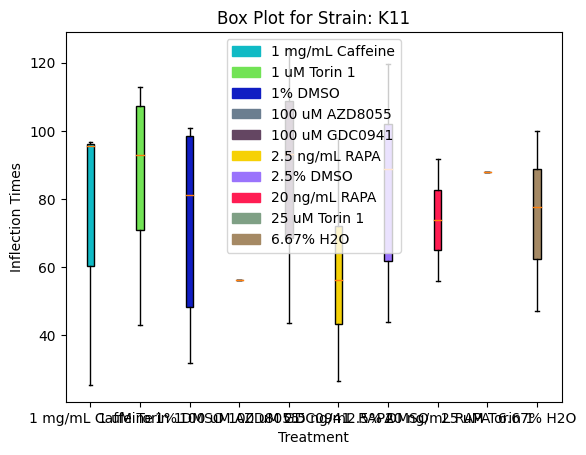

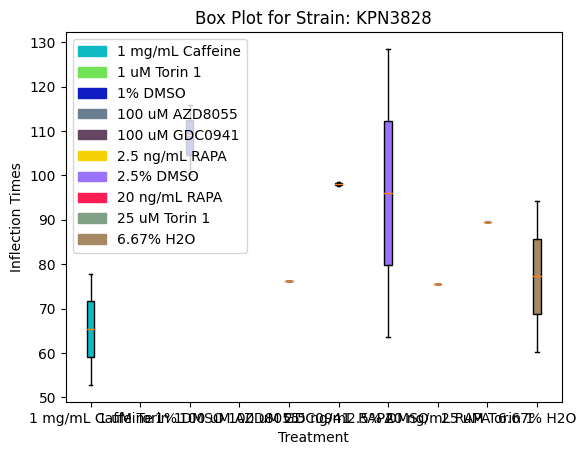

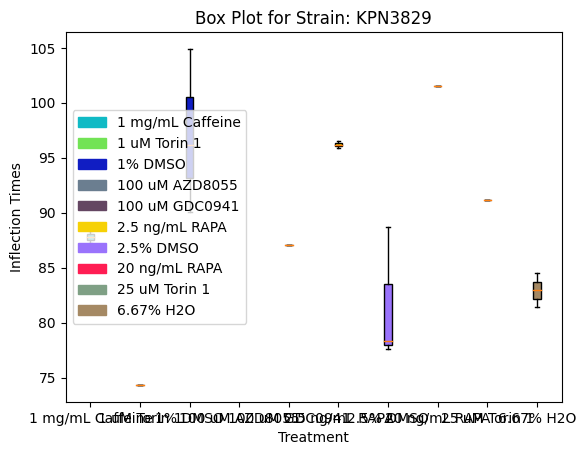

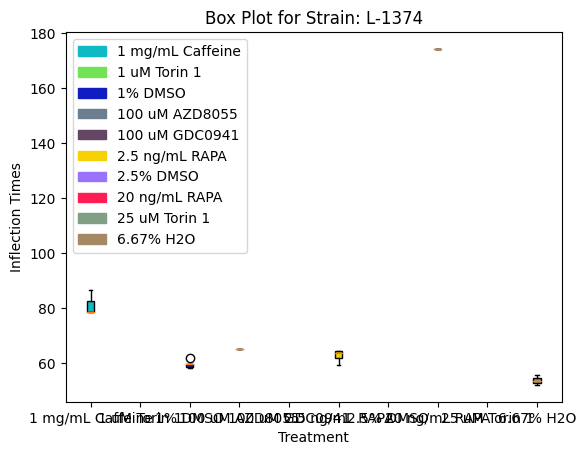

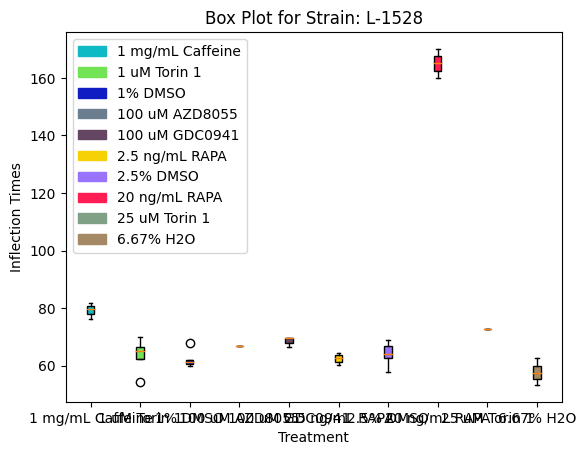

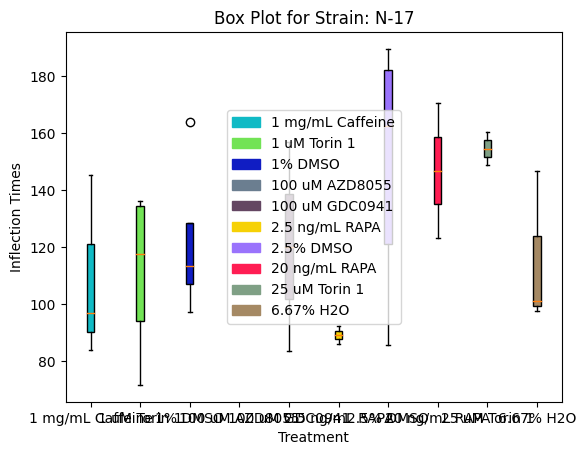

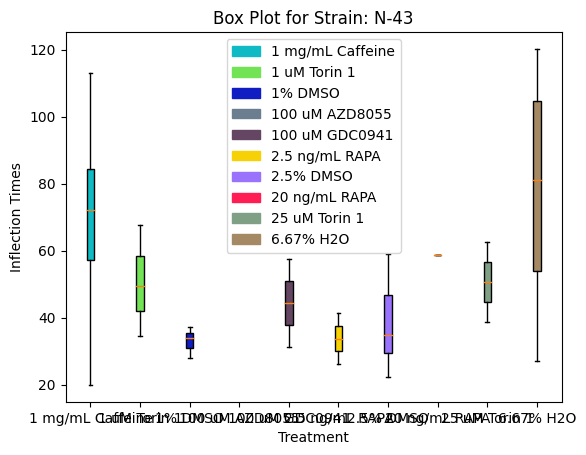

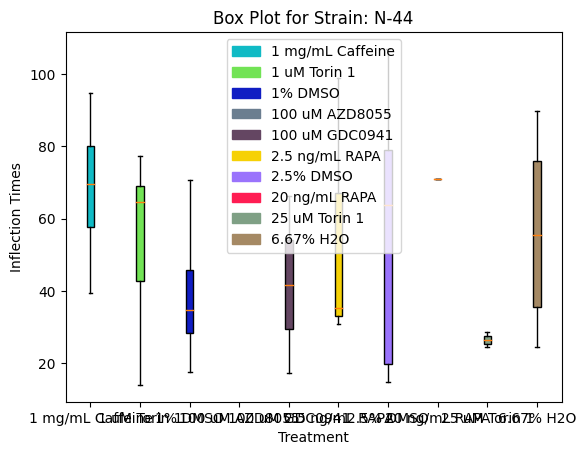

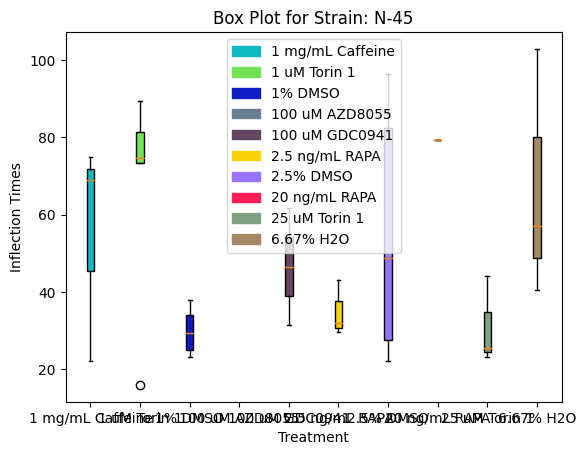

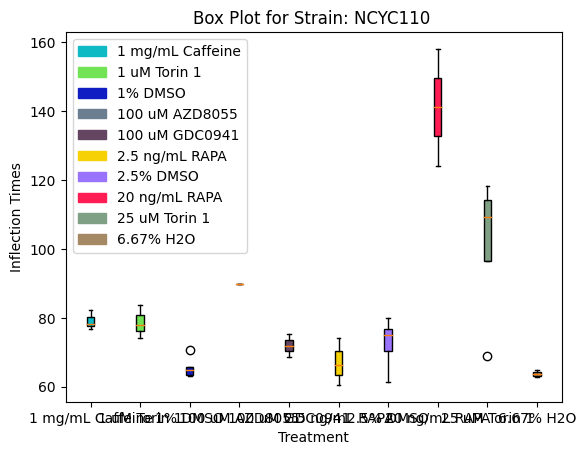

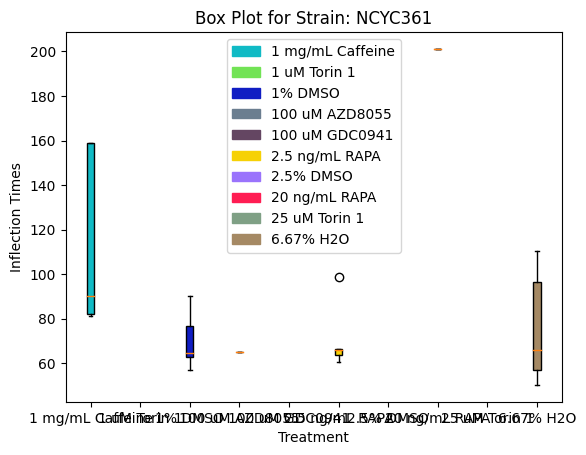

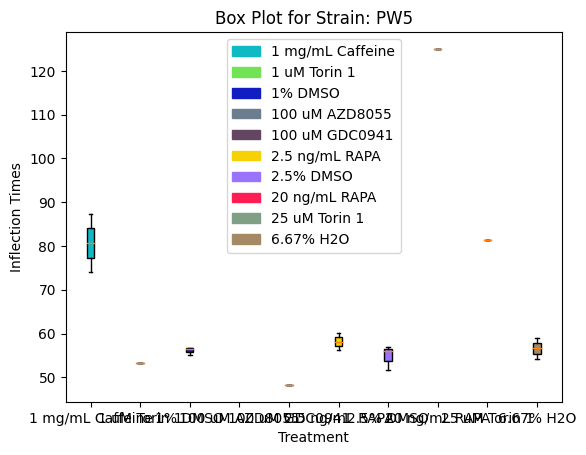

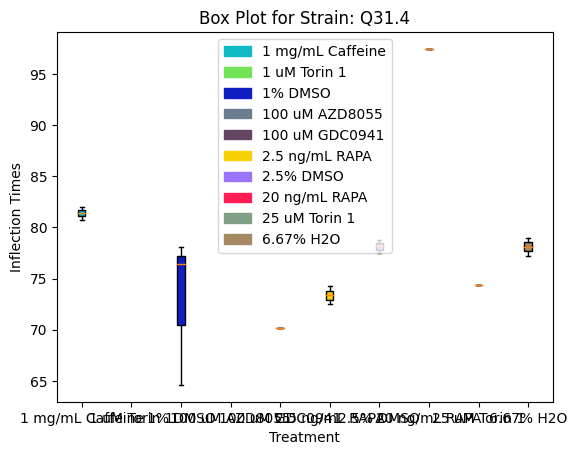

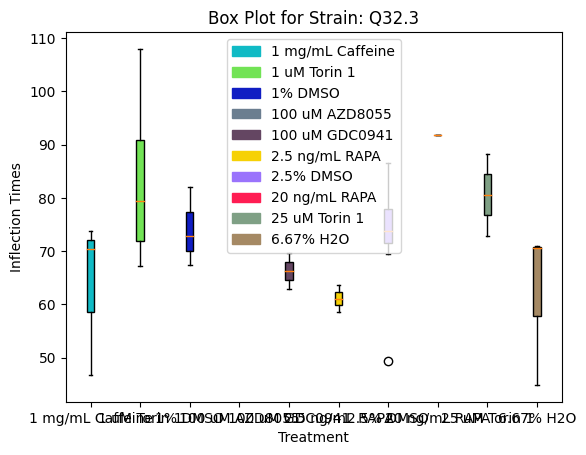

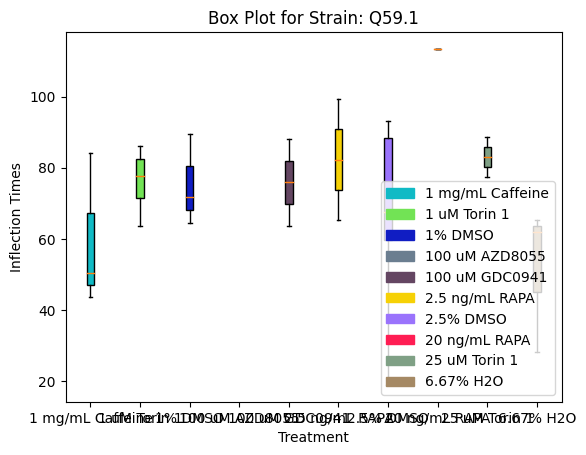

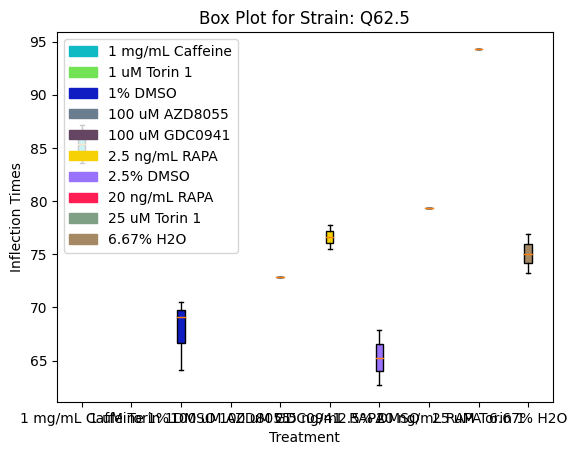

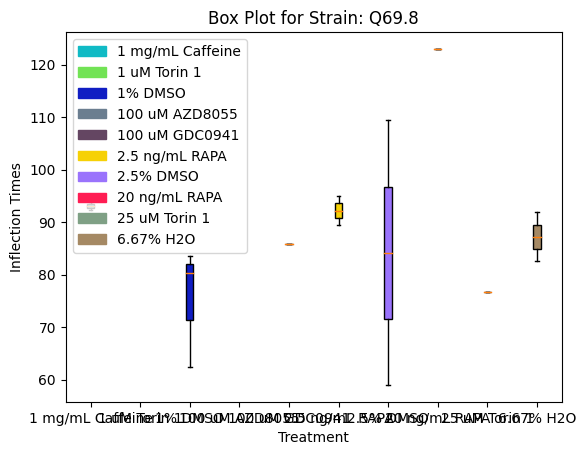

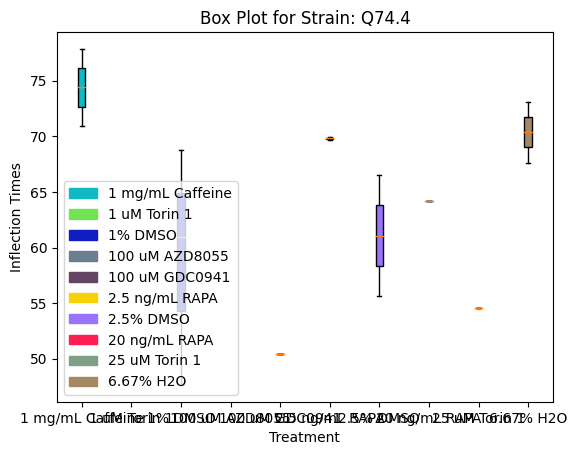

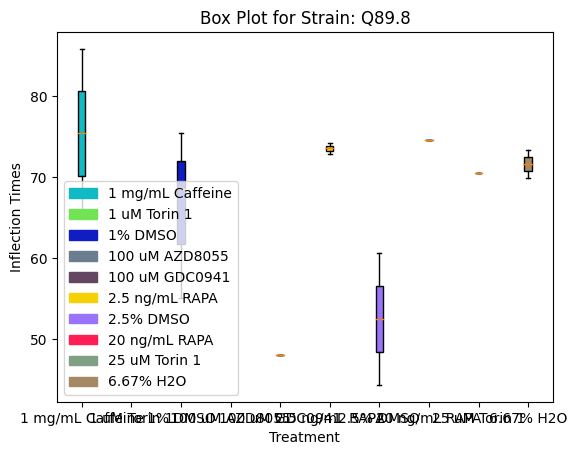

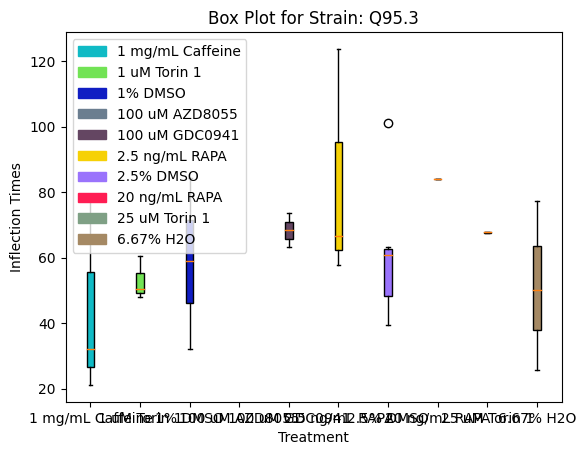

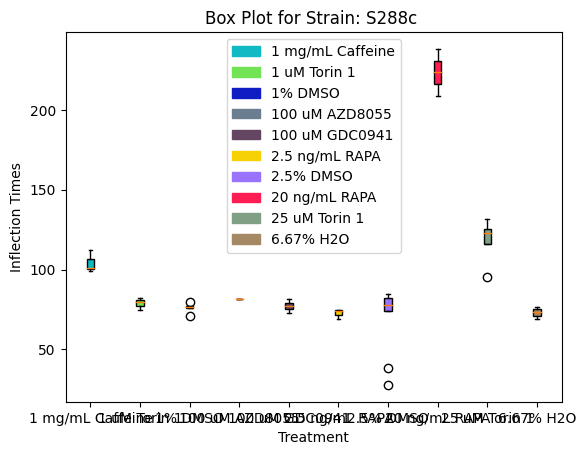

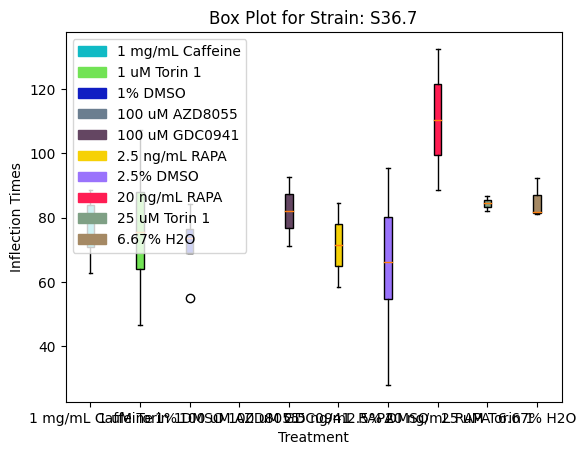

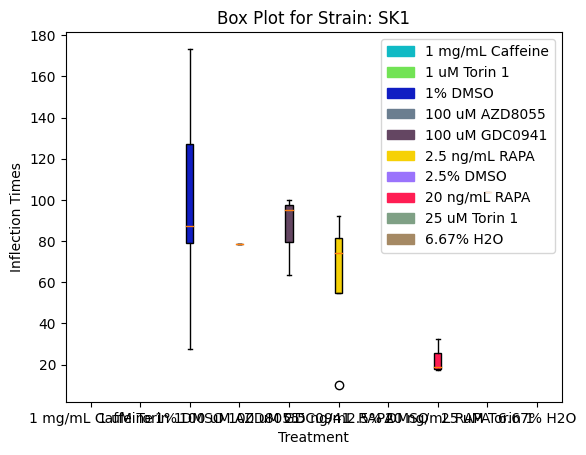

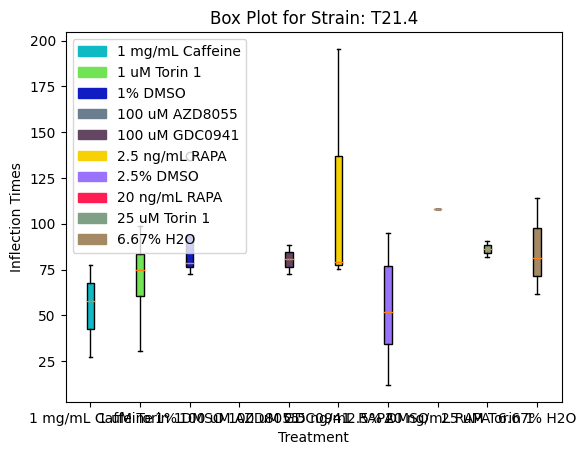

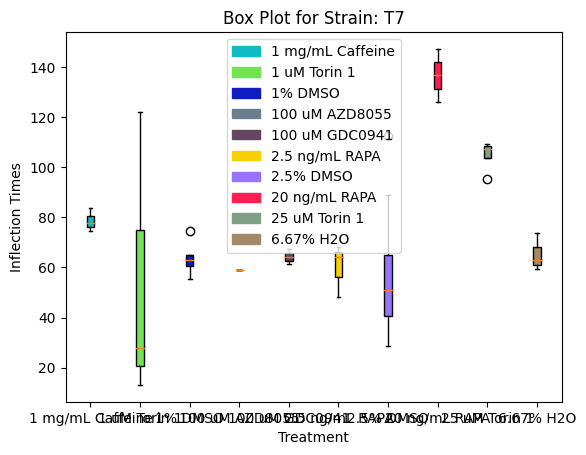

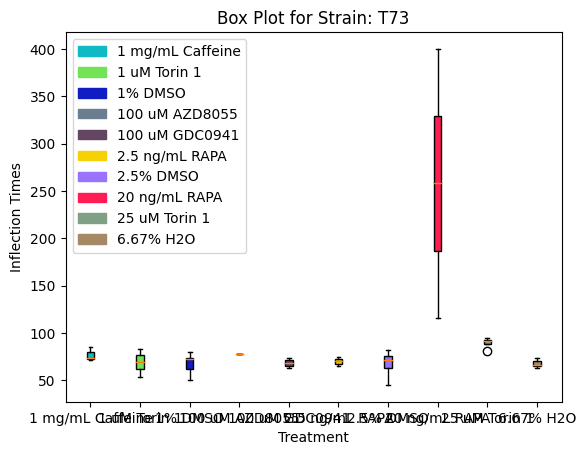

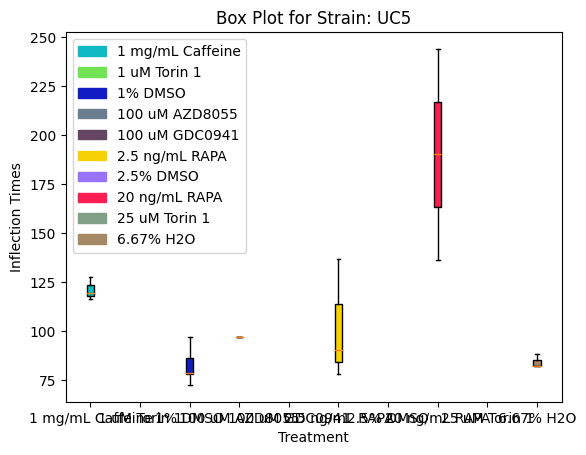

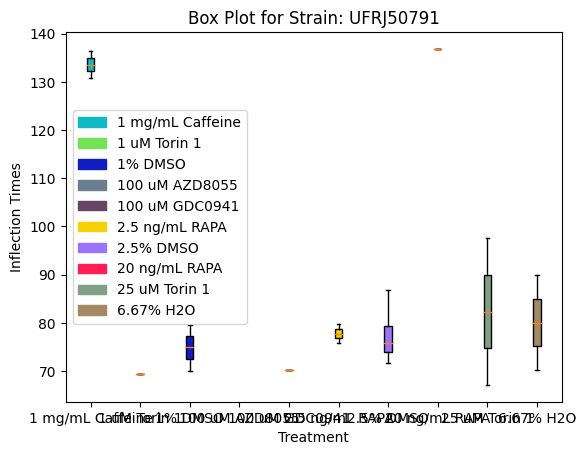

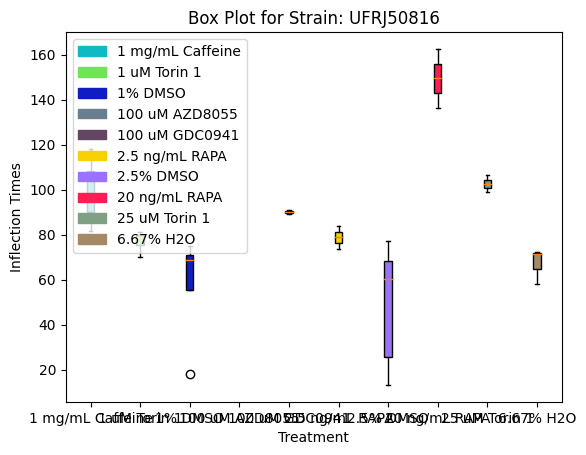

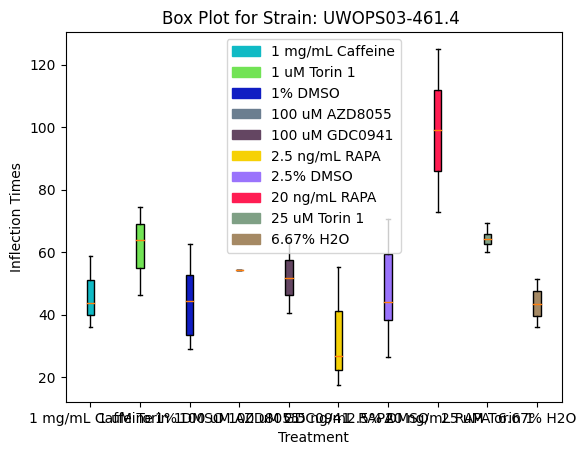

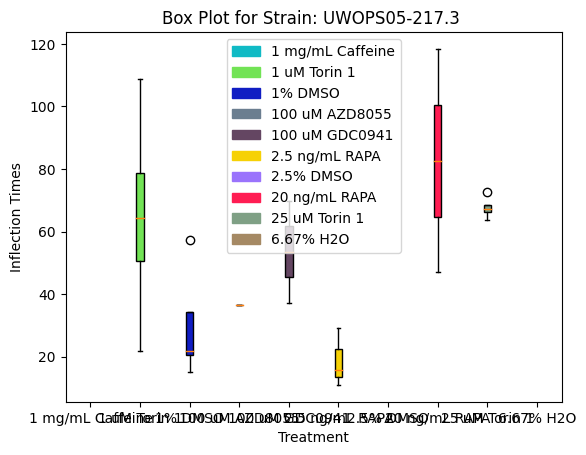

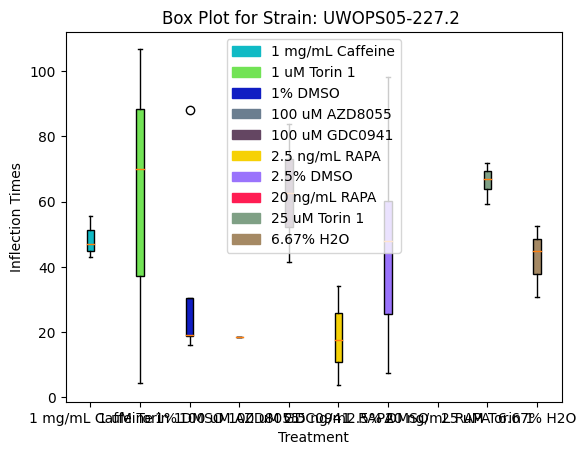

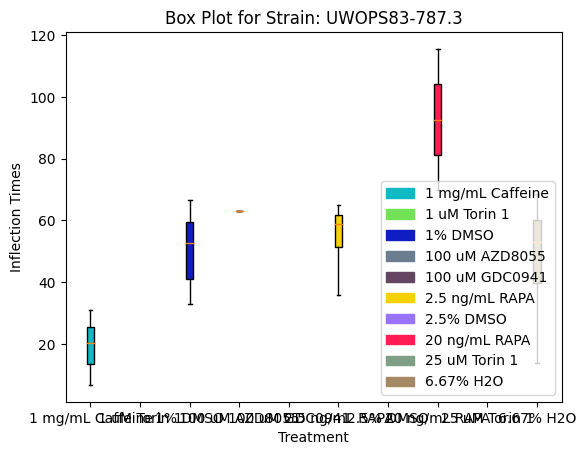

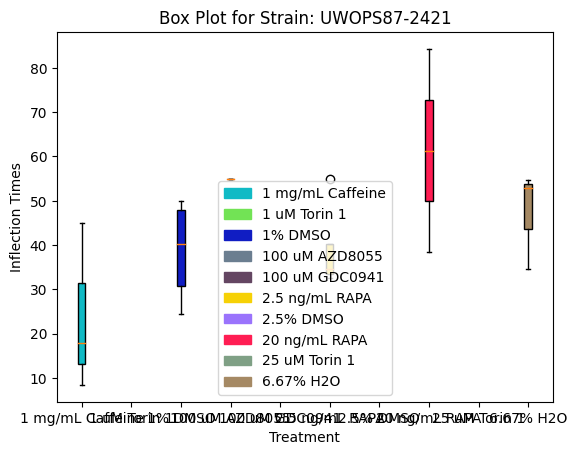

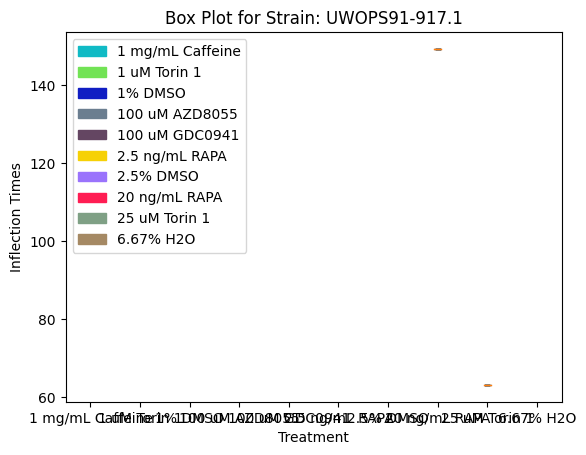

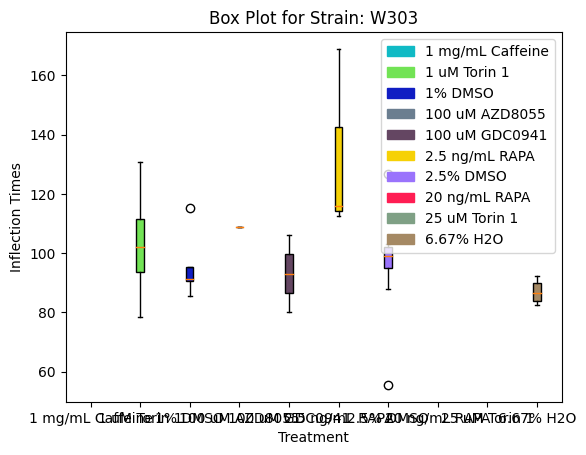

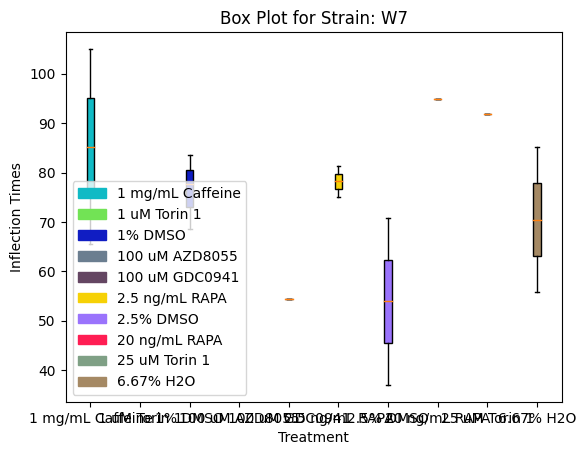

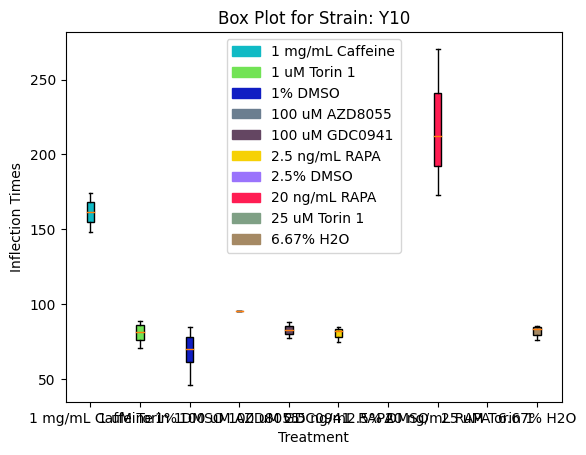

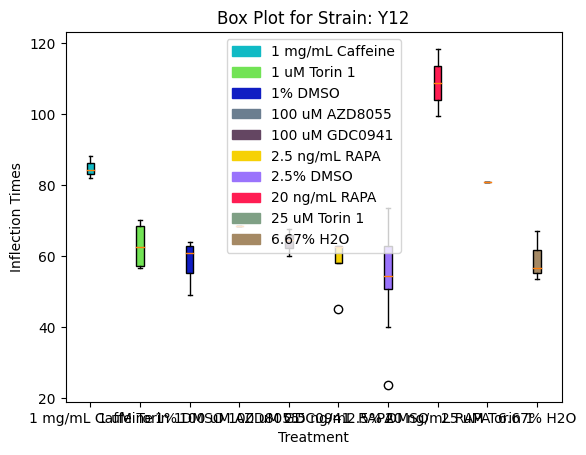

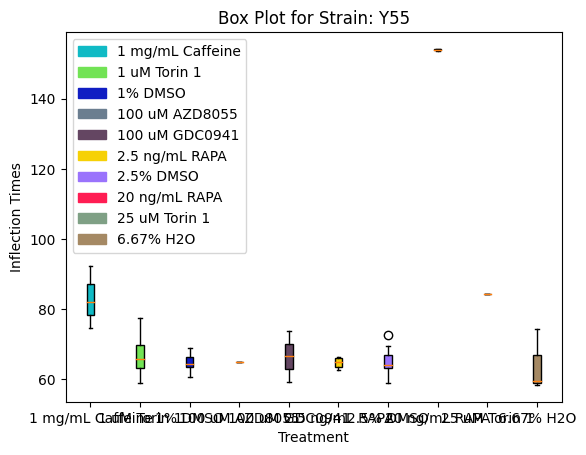

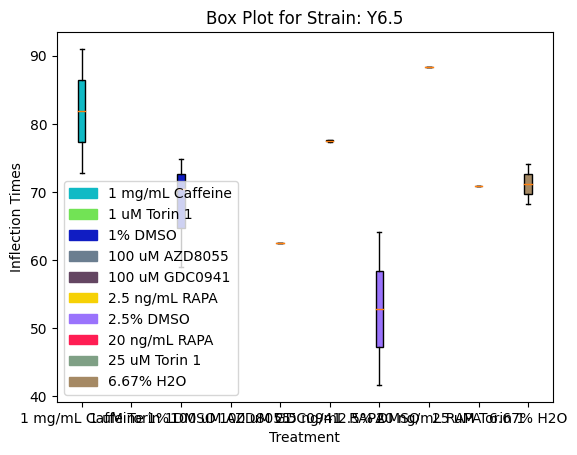

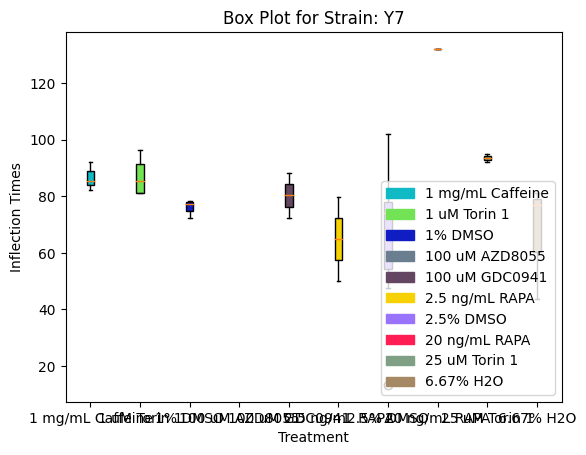

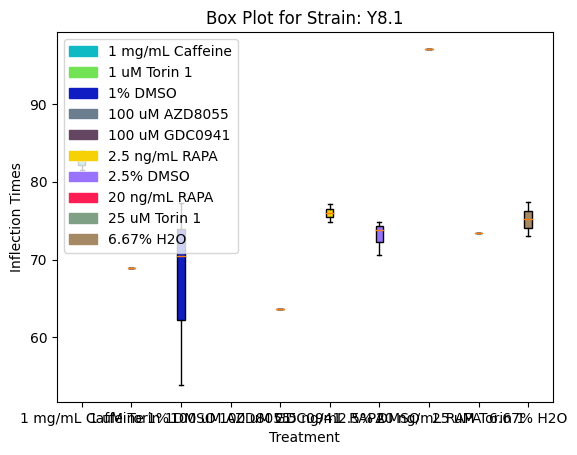

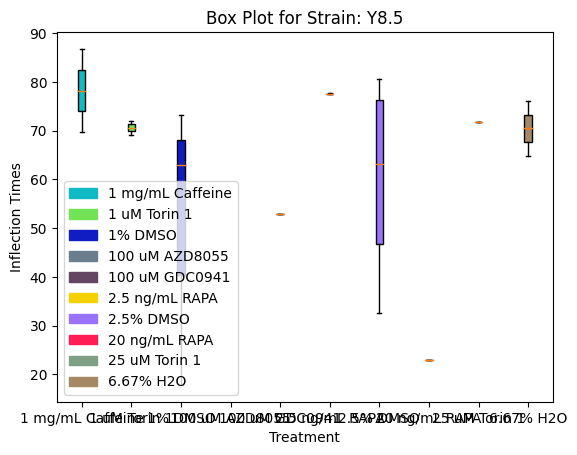

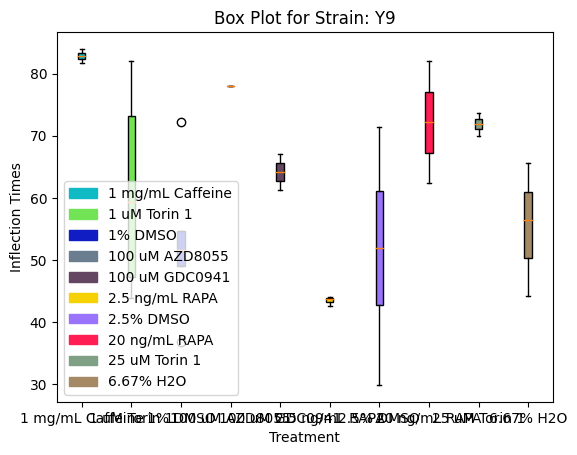

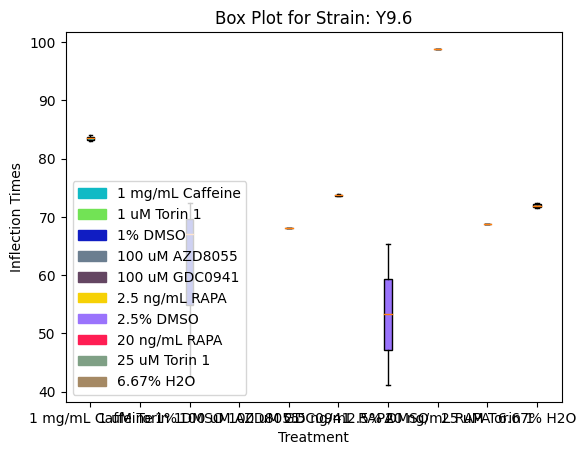

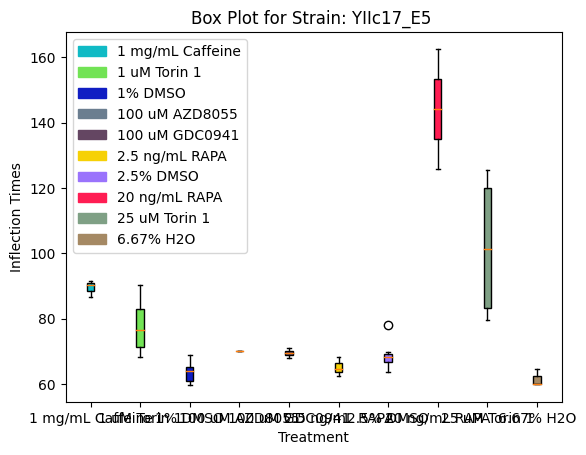

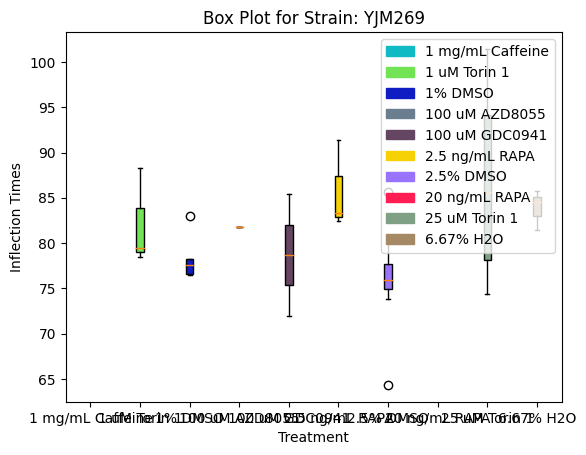

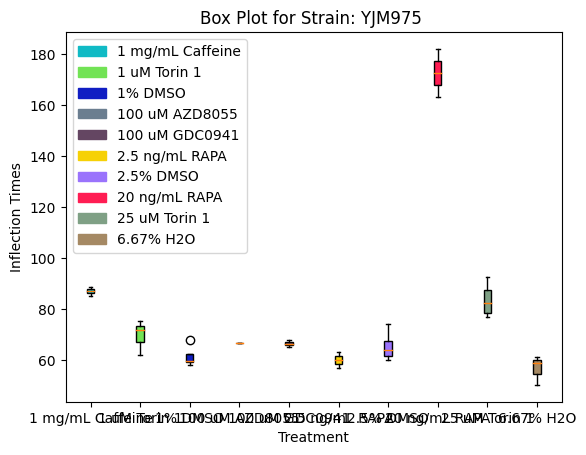

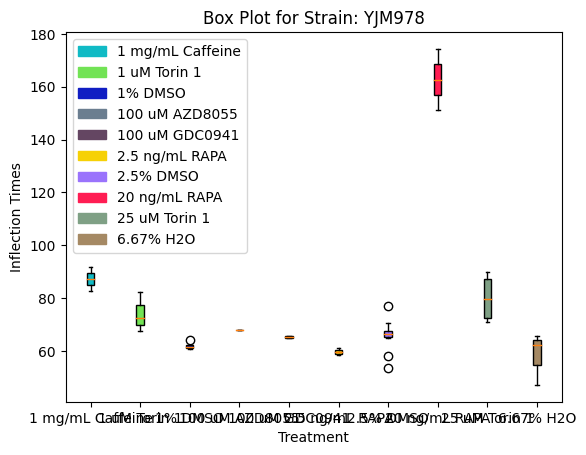

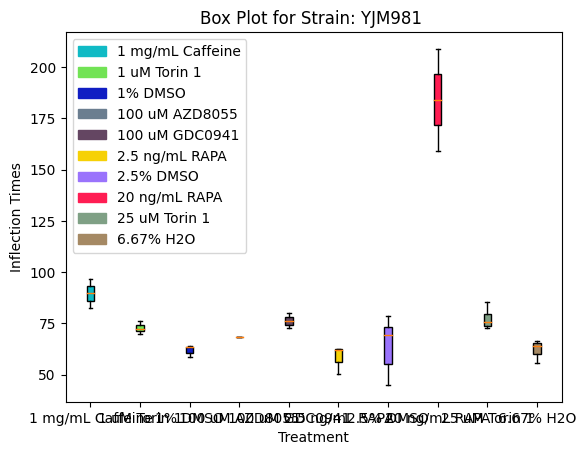

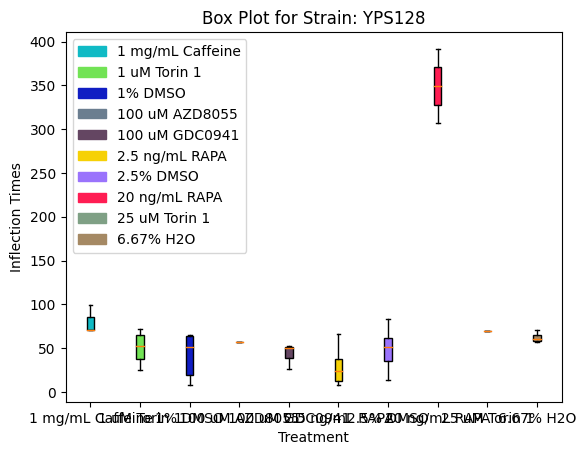

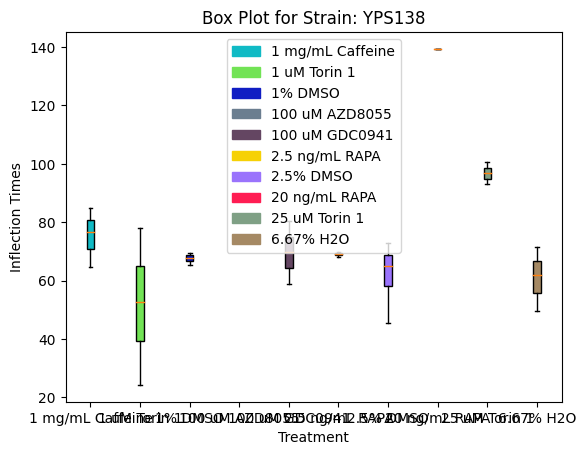

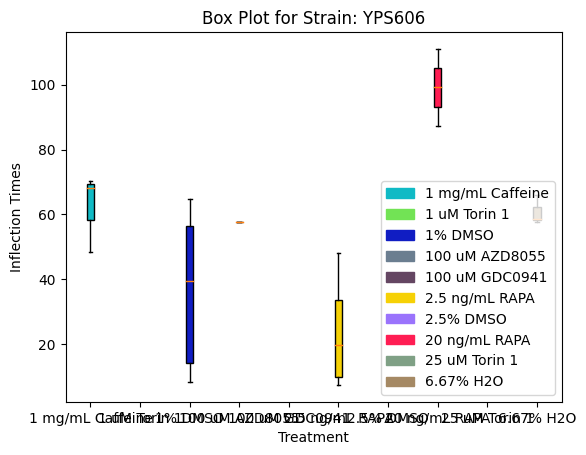

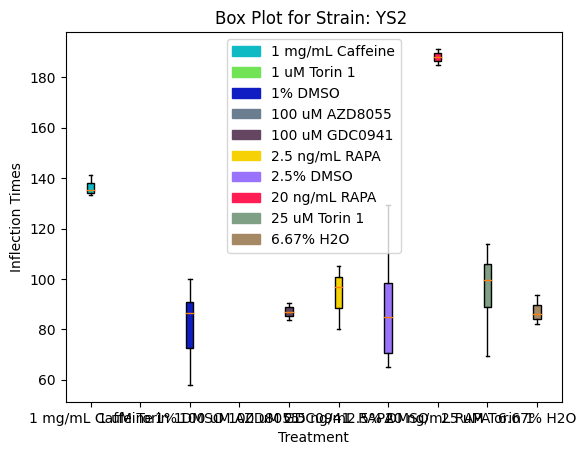

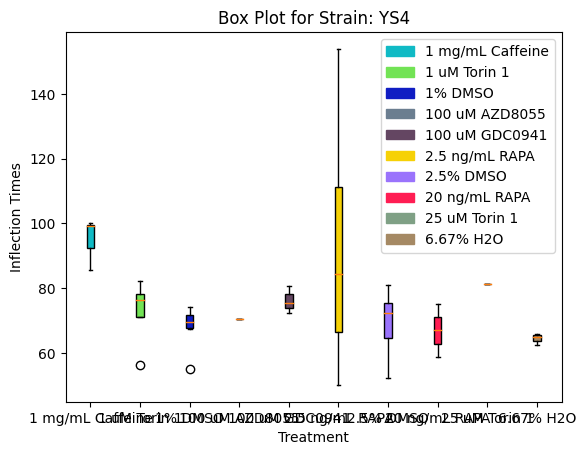

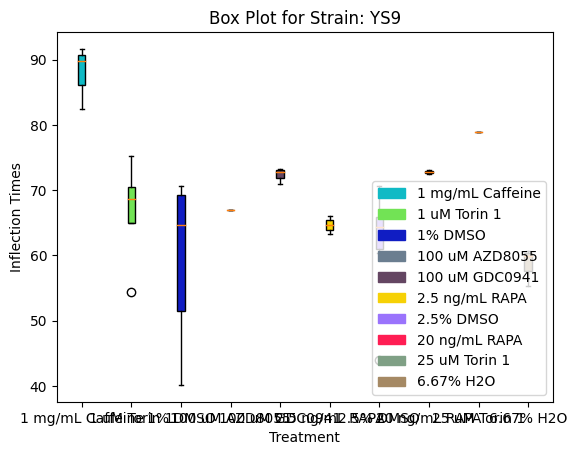

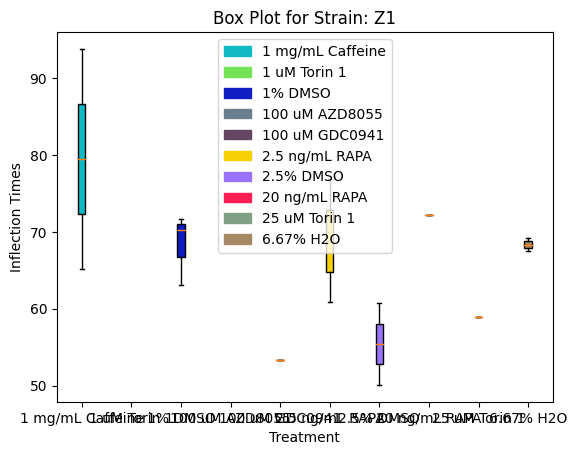

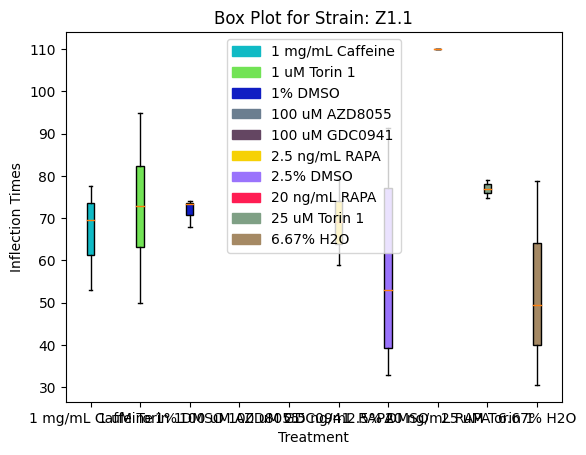

In [28]:
#create a list of random colors
num_colors = len(unique_treatments)
colors = generate_random_colors(num_colors)

#create plots for each strain
for strain in unique_strains:
    # filtering data for the current strain
    strain_treatments = treatments[strains == strain]
    strain_inflection_times = inflection_times[strains == strain]
    
    #create a figure and an axis
    fig, ax = plt.subplots()
    
    # plot box plots for each treatment
    for i, treatment in enumerate(unique_treatments):
        treatment_inflection_times = strain_inflection_times[strain_treatments == treatment]
        ax.boxplot(treatment_inflection_times, positions=[i], patch_artist=True,
                   boxprops=dict(facecolor=colors[i]))
    
    # setting labels and title
    ax.set_xticks(range(len(unique_treatments)))
    ax.set_xticklabels(unique_treatments)
    ax.set_xlabel('Treatment')
    ax.set_ylabel('Inflection Times')
    ax.set_title(f'Box Plot for Strain: {strain}')
    
    # creating the legend
    handles = [plt.Rectangle((0,0),1,1, color=color) for color in colors]
    labels = unique_treatments
    plt.legend(handles, labels, loc='best')
    
    
    plt.show()
